**<프로그래머를 위한 베이지안 with 파이썬(원제: Bayesian Methods for Hackers)> 책을 읽고 공부한 내용을 노트필기 정리하듯이 정리하였습니다. 제가 추가한 내용은 크게 다음과 같습니다.** 
- (1) 코드가 나오는 장의 제목, 소제목, 페이지 
- (2) 확률 개념에 대해 책에 정리된 내용 + 외부 자료
- (3) 읽으며 코드나 확률 개념을 이해하기 위해 실행해본 코드
- (4) 새롭게 알게된 내용이나 이해가 가지 않은 내용

책에서 제공하는 기존 주피터노트북 코드에 코멘트나 코드를 추가하였고, 삭제한 내용은 없습니다. 원본 코드가 궁금하시면 https://github.com/gilbutITbook/006775 를 참고해주세요. 


- **Last updated : 2018.09.22**

# 1장. 베이지안 추론의 철학
# 1.2. 베이지안 프레임워크


## (p.22) 1.2.1. 예제: 피해갈 수 없는 동전 던지기
### 동전던지기를 많이하면 앞면이 나올 확률p에 대한 우리의 추론은 어떻게 변할까? 

코드 1-1

In [2]:
"""
이 쥬피터노트북에서는 수정한 matplotlibrc 파일을 사용하고 있습니다. 이 파일에서는
matplotlib 작도를 위한  고유한 스타일을 제공합니다. 이 쥬피터노트북을 사용하고 
노트북의 스타일을 사용하고 싶다면 두 가지 방법이 있습니다.
1. 여러분의 matplotlibrc 파일을 책에서 제공하는 파일로 교체하세요. 자세한 방법은
http://matplotlib.org/users/customizing.html에서 확인하세요

2. bmh_matplotlibrc.json파일에도 스타일이 가능합니다. 이 방법은 현재의 노트북의 
스타일만 업데이트 합니다. 다음과 같은 코드를 추가해보세요
        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)
        
** 책에는 없는 코드라서 무시하셔도 될 듯합니다
"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')

figsize(11, 9)

import scipy.stats as stats

In [3]:
dist = stats.beta #사전확률분포로 베타확률분포를 불러온다
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500] # 동전 던지기는 0번 던지기부터 500번 던지기까지 해본다 

In [4]:
data = stats.bernoulli.rvs(0.5, size=n_trials[-1]) 
# 베르누이확률분포를 가진 데이터(0,1로 구성된)를 만드는데, p=0.5이고, 관측치는 500개를 가지도록 만든다. 

In [5]:
x = np.linspace(0, 1, 100) # 0부터 1까지의 선형구간을 100개로 쪼갠다

In [6]:
for k, N in enumerate(n_trials): #리스트의 인덱스(k)와 값(N)을 가지고 for문을 돌린다.
    print(N, "의 인덱스(k)는", k, "이다.")

0 의 인덱스(k)는 0 이다.
1 의 인덱스(k)는 1 이다.
2 의 인덱스(k)는 2 이다.
3 의 인덱스(k)는 3 이다.
4 의 인덱스(k)는 4 이다.
5 의 인덱스(k)는 5 이다.
8 의 인덱스(k)는 6 이다.
15 의 인덱스(k)는 7 이다.
50 의 인덱스(k)는 8 이다.
500 의 인덱스(k)는 9 이다.


In [7]:
heads = data[:N].sum() #N번 시행했을 때, 앞면이 나올 횟수의 합
y = dist.pdf(x, 1 + heads, 1 + N - heads)
y

array([0.00000000e+000, 0.00000000e+000, 7.56937399e-255, 4.07050505e-214,
       1.42425955e-185, 1.03296425e-163, 4.38790009e-146, 2.21549567e-131,
       8.01656485e-119, 6.62188048e-108, 2.75364759e-098, 1.01308478e-089,
       4.99927887e-082, 4.53773043e-075, 9.68183432e-069, 5.89683833e-063,
       1.19878884e-057, 9.24270795e-053, 3.00370847e-048, 4.49428114e-044,
       3.33551965e-040, 1.30829195e-036, 2.86348326e-033, 3.66532735e-030,
       2.85794031e-027, 1.40656320e-024, 4.50788457e-022, 9.66977910e-020,
       1.42241211e-017, 1.46600888e-015, 1.07906353e-013, 5.76958903e-012,
       2.27520098e-010, 6.70741875e-009, 1.49626430e-007, 2.55313840e-006,
       3.36469542e-005, 3.45429636e-004, 2.78380869e-003, 1.77308963e-002,
       8.97907511e-002, 3.63428374e-001, 1.18105445e+000, 3.09372795e+000,
       6.55372583e+000, 1.12582262e+001, 1.57169544e+001, 1.78604682e+001,
       1.65396856e+001, 1.24892052e+001, 7.69060697e+000, 3.86040369e+000,
       1.57819689e+000, 5

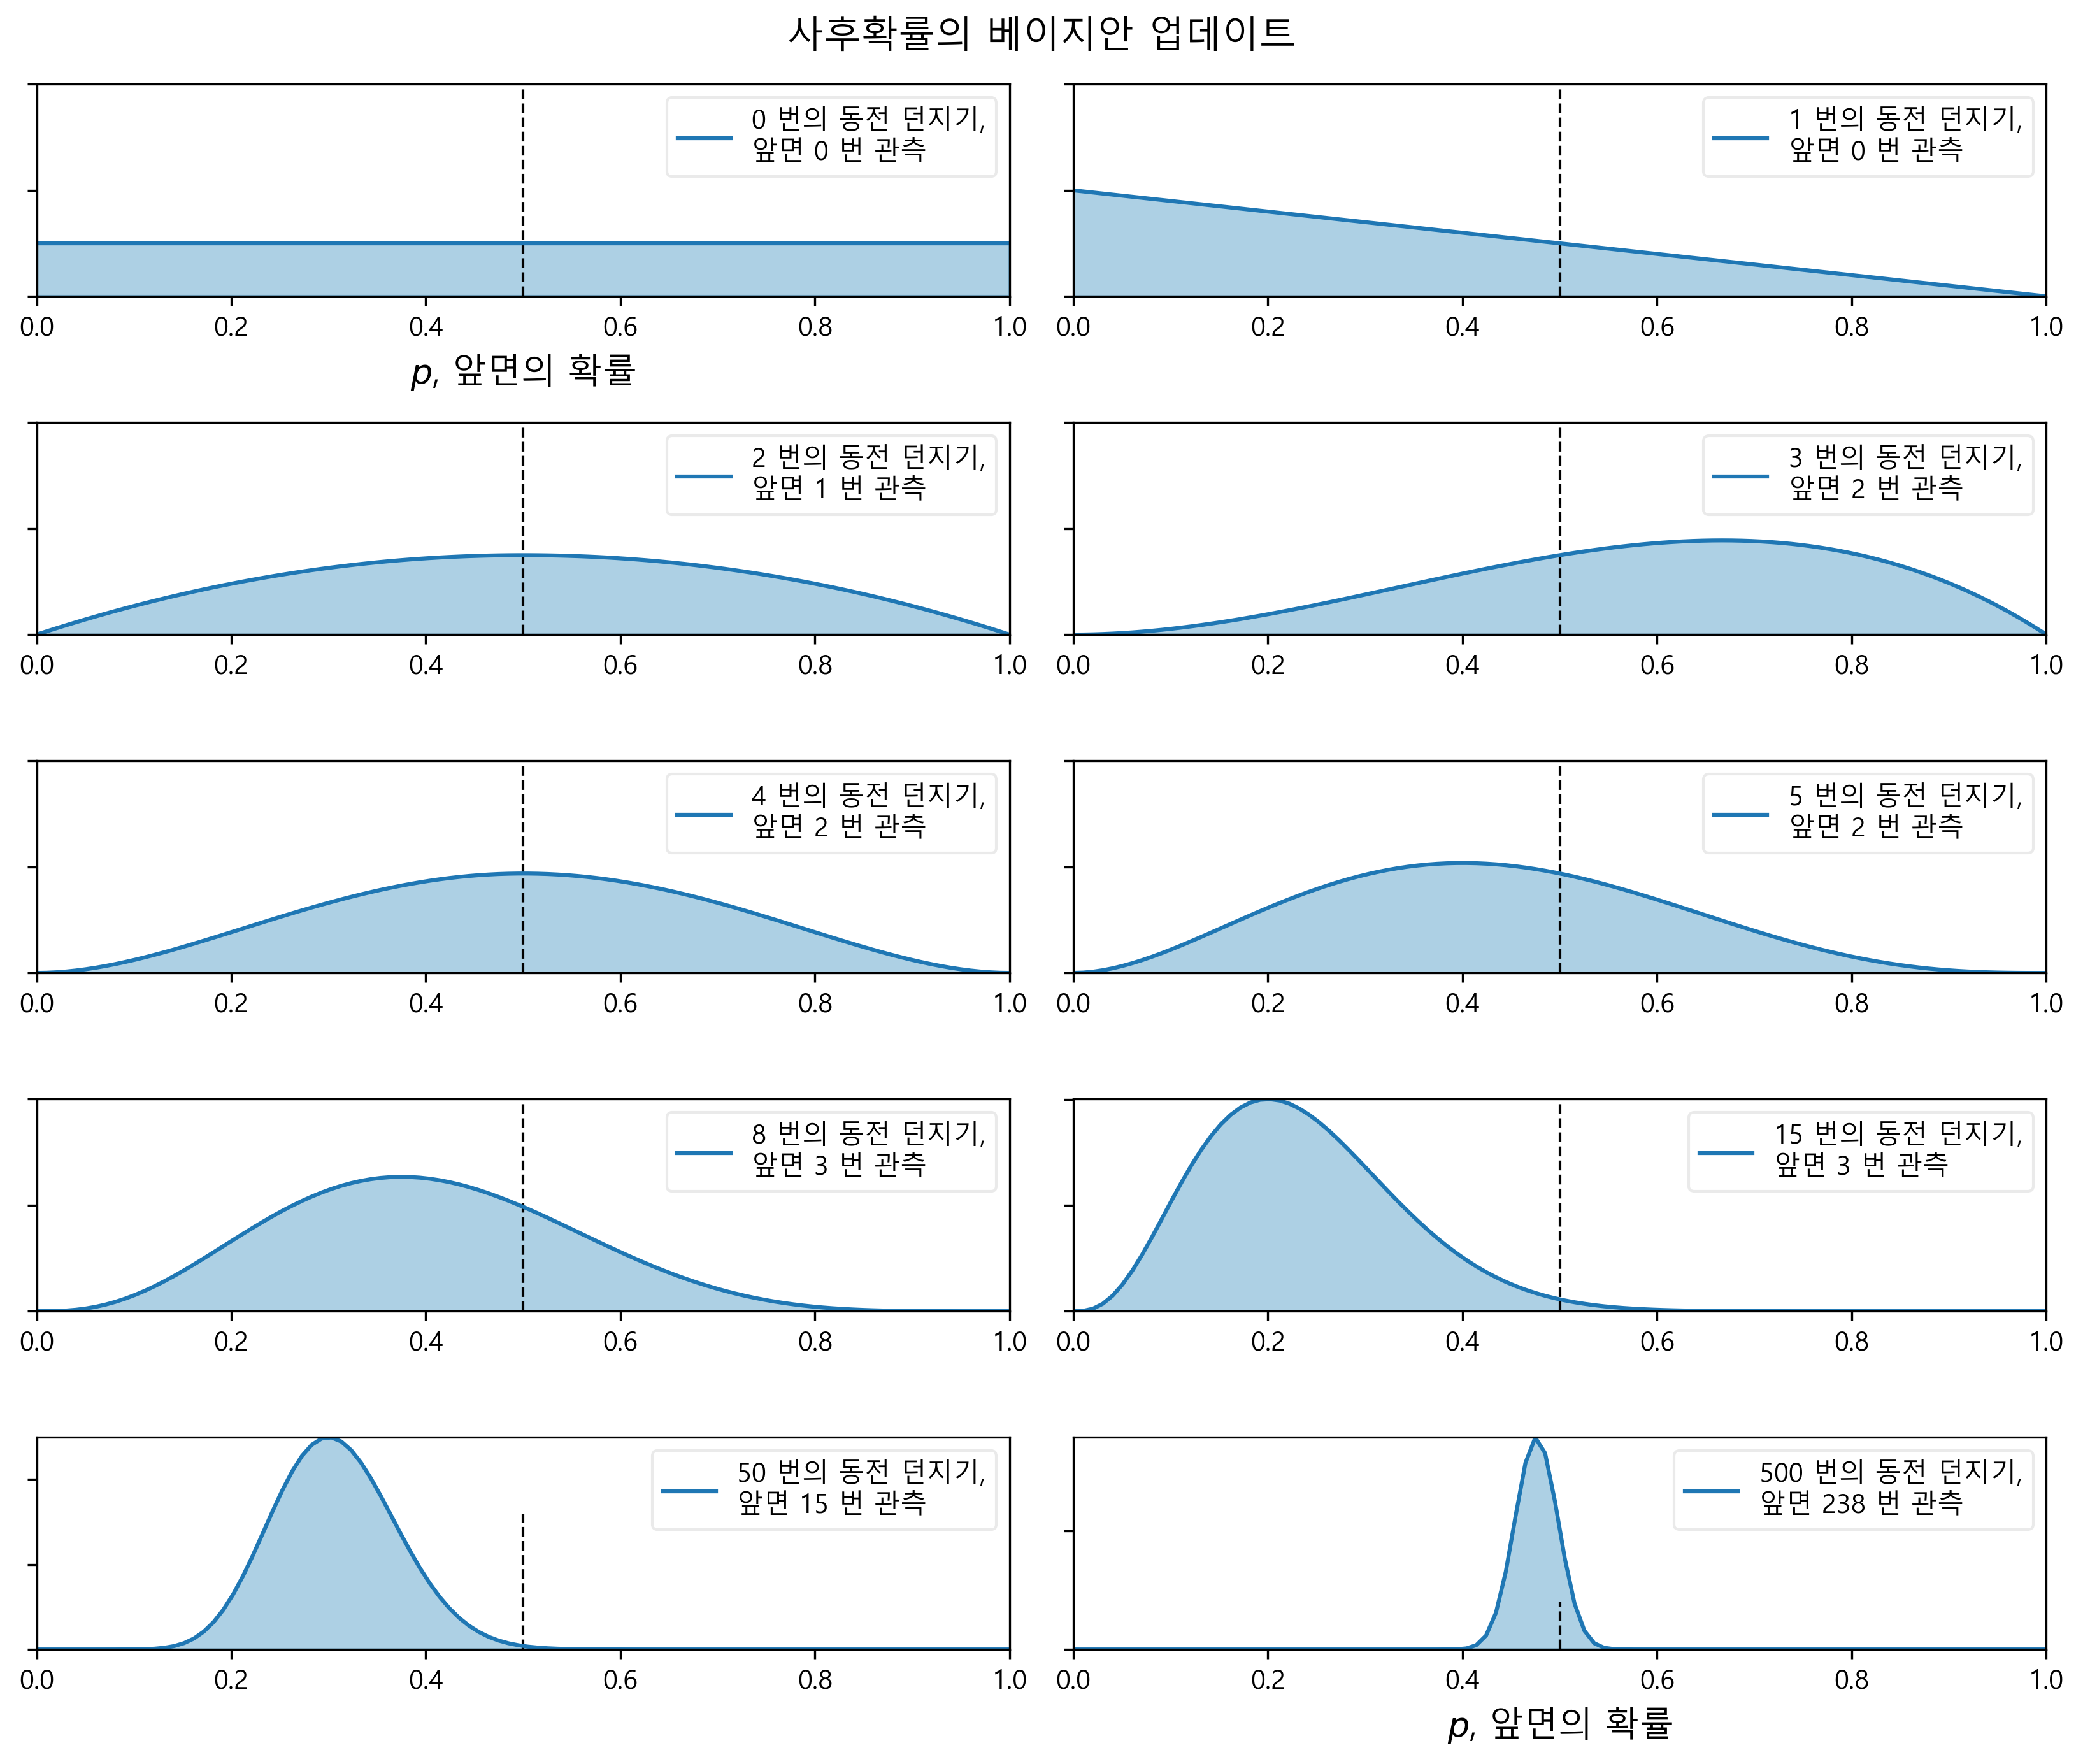

In [10]:
figsize(11,9)
# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials): #리스트의 인덱스(k)와 값(N)을 가지고 for문을 돌린다.
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1) # subplot(nrows, ncols, index)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None # k가 0과 len(n_trials)-1  중에 있으면 x레이블을 붙여주고, 아님 만다
    plt.setp(sx.get_yticklabels(), visible=False) # y축에 간격 표시는 하되, 숫자는 보여주지 않는다
    
    heads = data[:N].sum() #N번 시행했을 때, 앞면이 나올 횟수의 합
    y = dist.pdf(x, 1 + heads, 1 + N - heads) # dist(=stats.beta) 분포에 따라 PDF, 즉 y값으로 라인을 구성한다. 
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads)) # (x,y) 라인을 그린다. 
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4) # (x, 0부터 y값 밑부분)까지 색을 채워넣는다. 
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)  # 세로 점선 라인을 x값 0.5, y값 0~4 지점에 그려준다. 

    leg = plt.legend() # plt의 레이블(legend)
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight= True) # margine을 두지 않고 tight하게 붙여서 그린다. 
    
plt.suptitle("사후확률의 베이지안 업데이트",y=1.02,fontsize=14)
plt.tight_layout()

코드 1-2


### (p.25) 1.2.2. 예제: 사서일까? 농부일까? 

직업이 농부와 사서밖에 없고, 남자 농부와 남자 사서의 비율은 20:1이라고 가정하자. 그런데, 스티브라는 사람의 성격에 대한 새로운 정보를 입수하였다. 이 정보를 얻은 후, 스티브가 사서일 확률은 어떻게 변할까? 

In [11]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300 # figure dots per inch or 'figure'
plt.rcParams['figure.dpi'] = 300 # figure dots per inch
colors = ["#348ABD", "#A60628"]

직업이 농부와 사서밖에 없고, 남자 농부와 남자 사서의 비율은 20:1이라고 가정했으니, 사전 확률은 이와 같다. 

In [12]:
prior = [1/21., 20/21.] 

스티브에 대한 정보를 얻은 후 사서에 대한 사후확률은 업데이트 되었다. 사후확률을 구하기 전, X라는 정보를 얻을 확률은 "사서이고 X라는 정보를 줄 확률 + 사서가 아니면서 X라는 정보를 줄 확률", 즉 "사서인데 X라는 정보를 줄 확률X사서일 확률 + 사서가 아닌데 X라는 정보를 줄 확률X사서가 아닐 확률"로 구할 수 있다. 
- ${\displaystyle P(X) = P(X and A) + P(X and ~A) = P(X|A)*P(A) + P(X|~A)*P(~A) = 0.95*(1/21) + 0.5*(20/21) = 0.52}$ 

그 다음, 사후 확률은 다음과 같이 구할 수 있다.  
- ${\displaystyle P(A|X) = {\frac {P(X|A)P(A)}{P(X)}} =  {\frac {0.95/21}{(0.95*(1/21) + 0.5*(20/21)}} = 0.087} $

In [13]:
posterior = [0.087,1-0.087] 

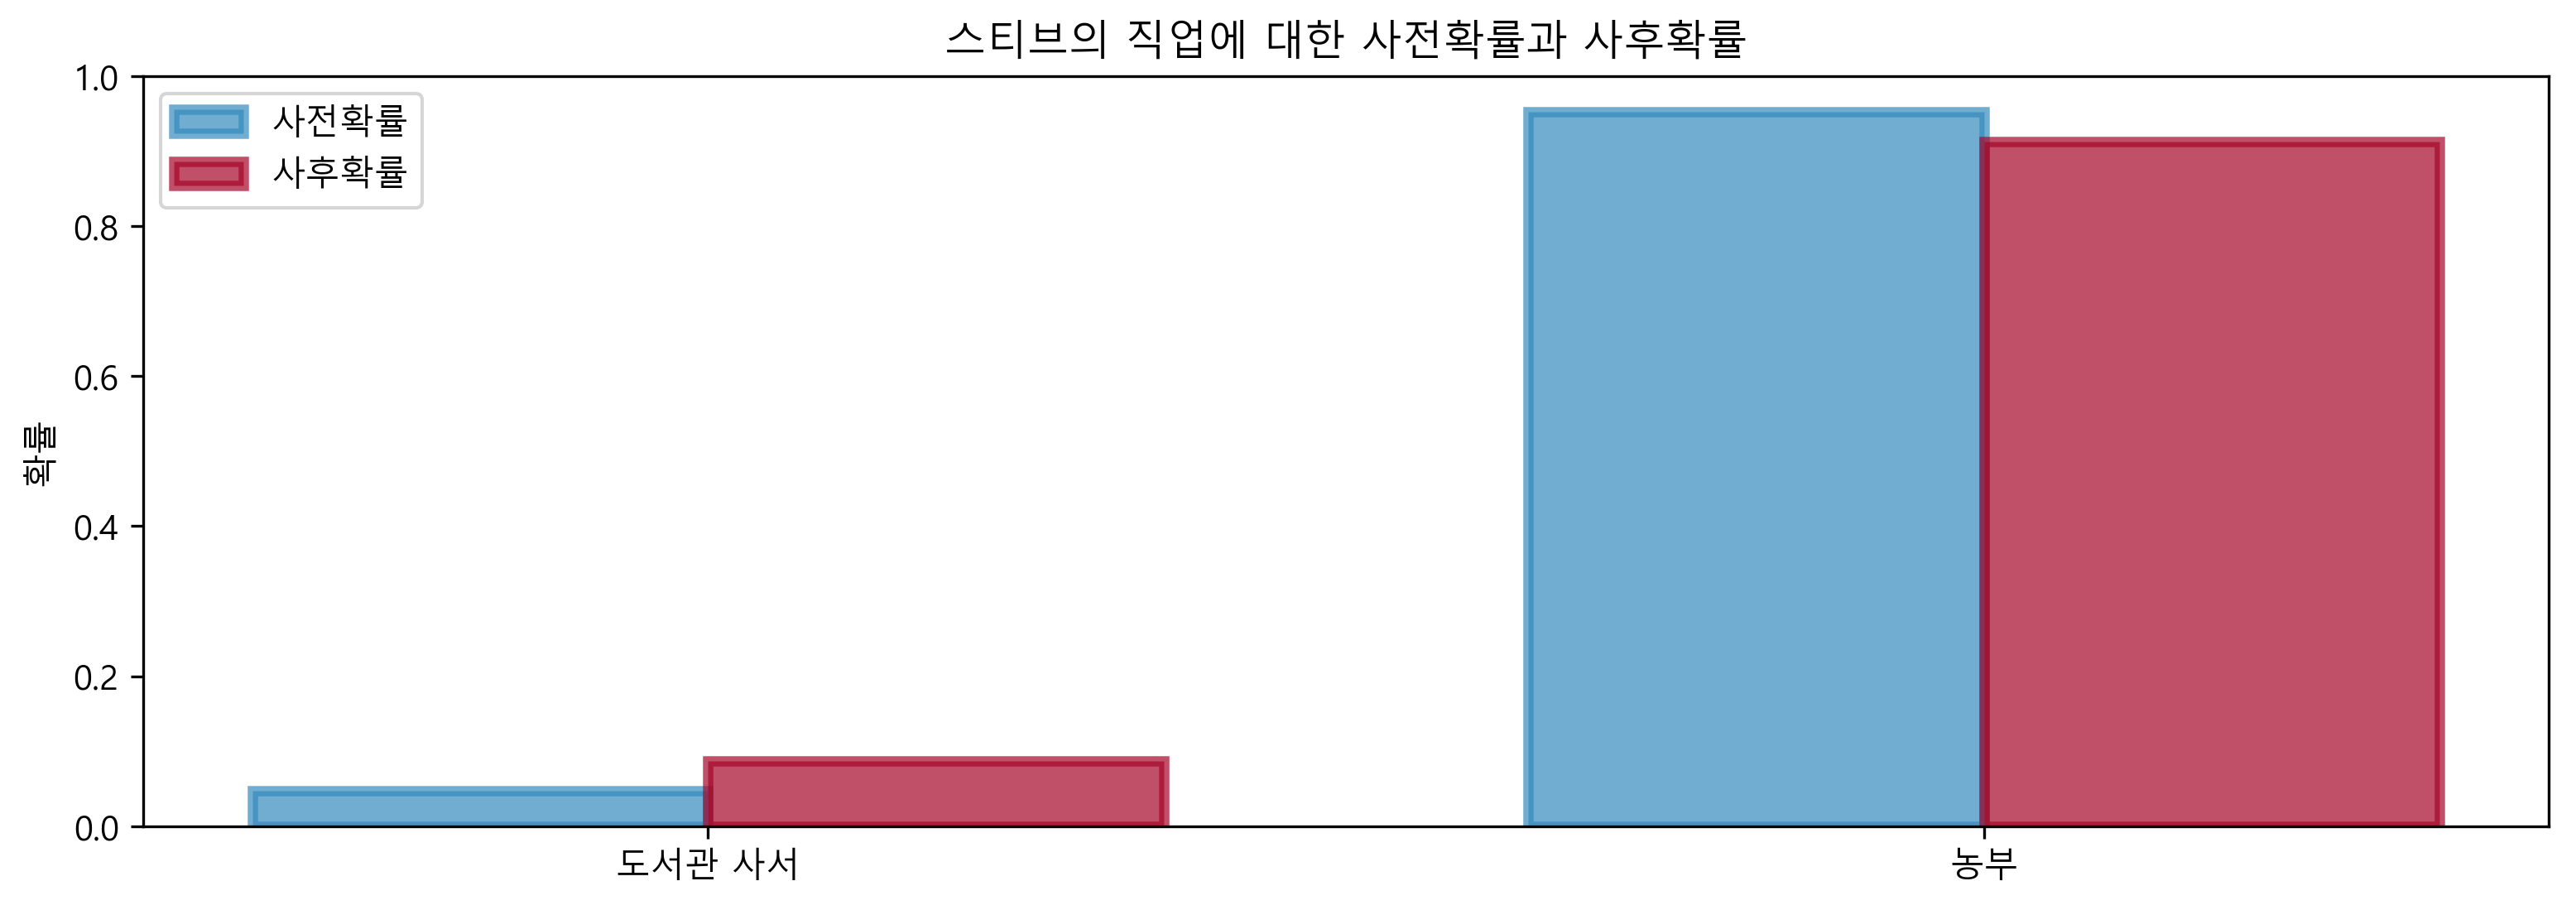

In [14]:
plt.bar([0, .7], prior, alpha = 0.7, width = 0.25,
       color = colors[0], label = "사전확률", lw = "3", edgecolor = "#348ABD")
plt.bar([0+0.25, .7+0.25], posterior, alpha = 0.7, width = 0.25,
       color = colors[1], label = "사후확률", lw = "3", edgecolor = "#A60628")

plt.xticks([0.25/2, (0.25/2)+.7], ["도서관 사서", "농부"])
plt.title("스티브의 직업에 대한 사전확률과 사후확률")
plt.ylabel("확률")
plt.legend(loc = "upper left")

# 1.3. 확률분포

- 확률 변수는 (1) 이산적인 형태이거나 (2) 연속적인 형태이거나 (3) 혼합된 형태일 수 있다.
- 확률분포함수(Probability Density Function)은 확률변수가 가지는 특정 값(결과)에 대한 확률을 나타낸다.

## (p.27) 1.3.1. 확률변수가 이산적인 경우

- 확률변수가 이산적이면, 그 분포는 Probability Mass Function이라고 한다. 
- 이산확률분포에는 베르누이 분포, 푸아송 분포, 이산균등분포(discrete uniform distribution) 등이 있다. 
- 푸아송 분포(Poisson分布, 영어: Poisson distribution)는 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다.

**Reference** : https://ko.wikipedia.org/wiki/%ED%91%B8%EC%95%84%EC%86%A1_%EB%B6%84%ED%8F%AC

### 포아송 확률 분포: $\lambda$ 값게 따라 변하는 이산확률분포

In [15]:
print(np.arange(16))
print(stats.poisson.pmf(np.arange(16), 1.5)[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0.22313016014842982


Text(0.5,1,'$\\lambda$값을 달리하여 만든 포아송 랜덤변수의 확률질량함수')

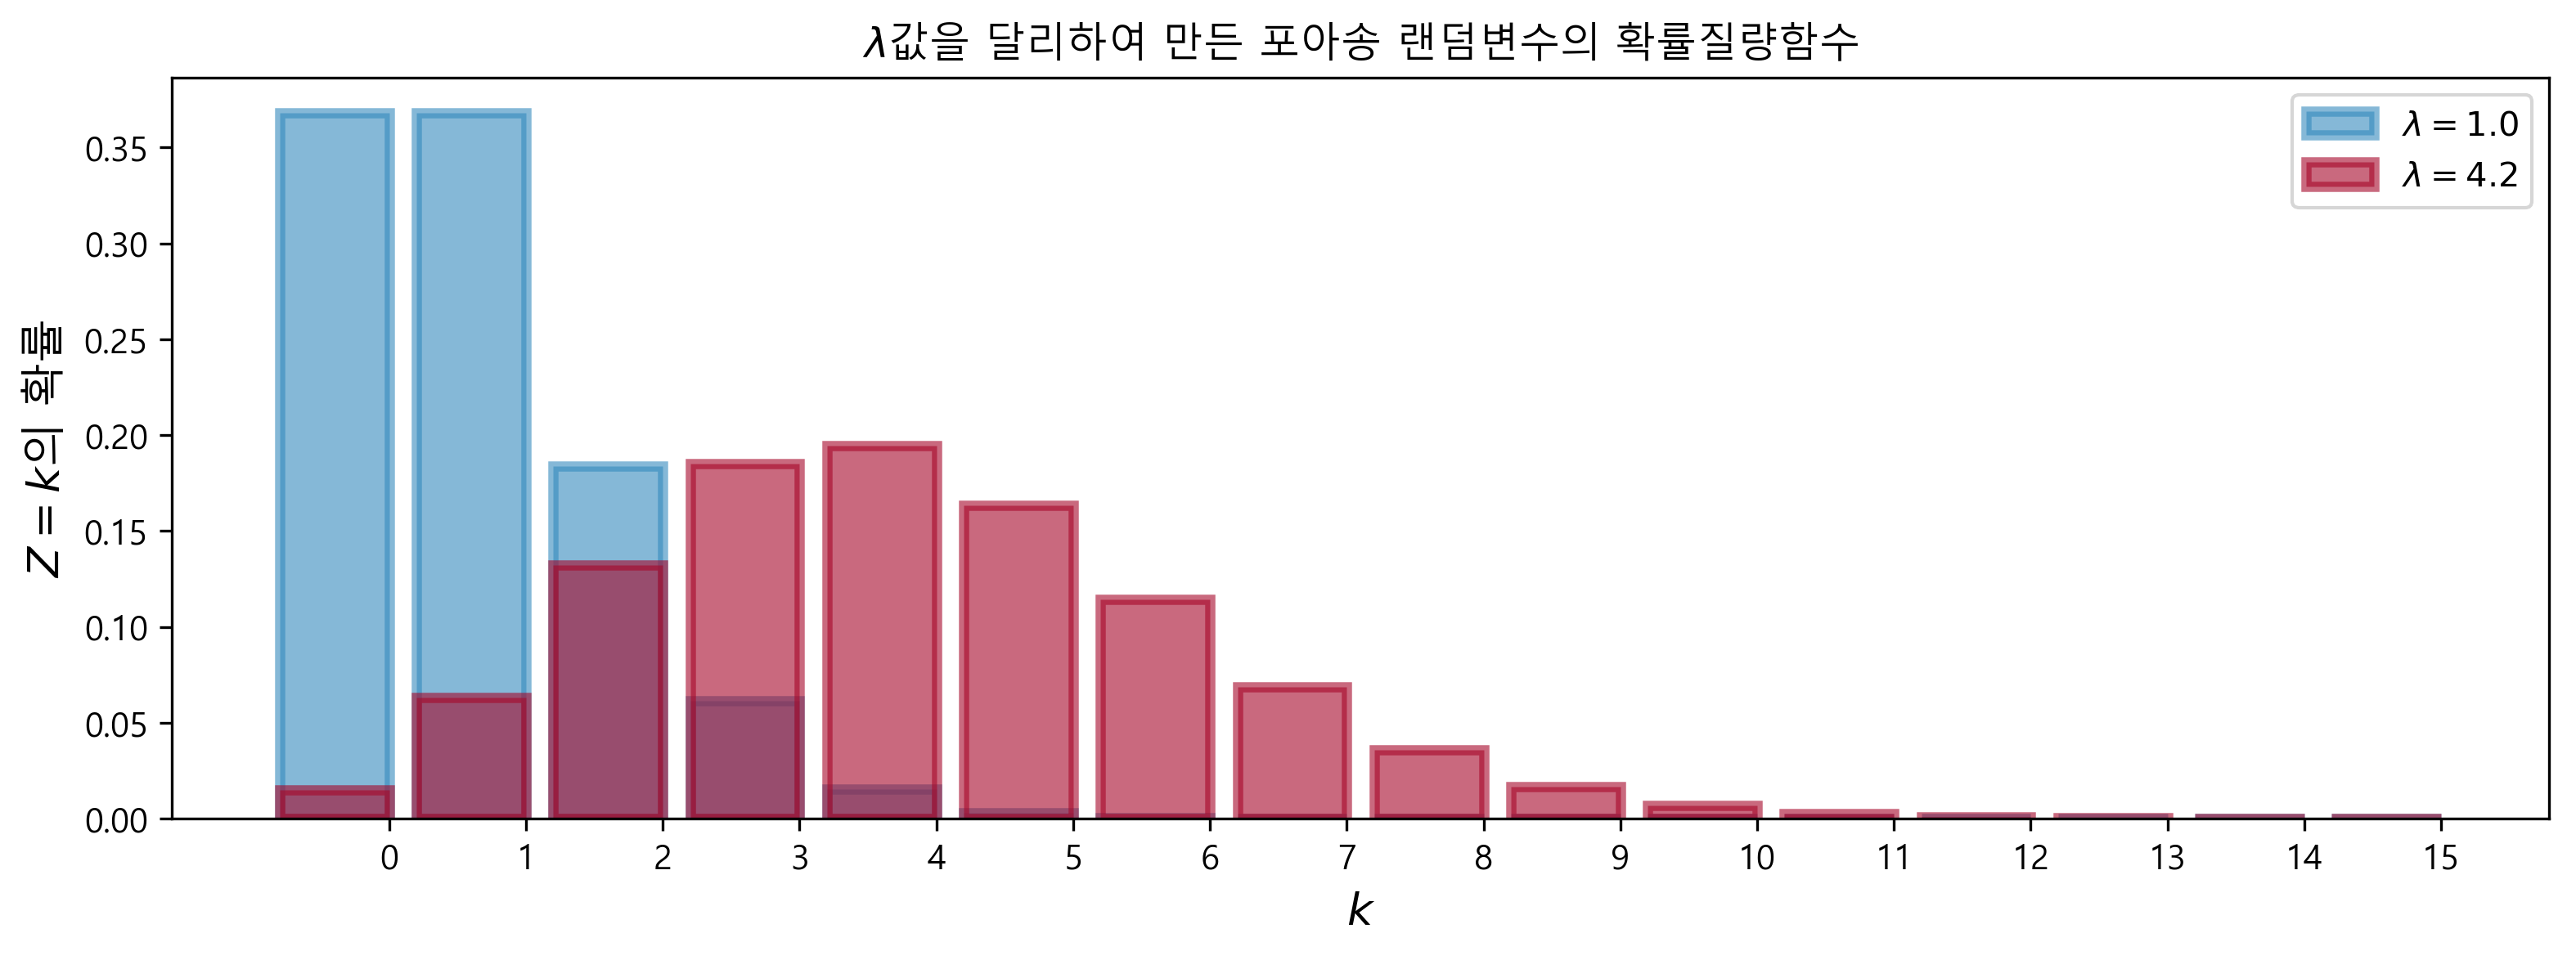

In [16]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16) #0부터 15까지 숫자로 array를 만든다. 
poi = stats.poisson #푸아송 분포를 가져온다. 
lambda_ = [1, 4.2] # lambda는 1.5와 4.2를 비교한다. 
colours = ["#348ABD", "#A60628"]

# 첫번째 lambda 값으로 확률 분포를 그리자.
plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3") # %.1f 는 소수점 첫째자리까지의 float이다. 

# 두번째 lambda 값으로 확률분포를 그리자. 
plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a+0.4, a) # a+0.4 위치에 x축 레이블을 남기고, a값으로 써준다. 
plt.legend()
plt.ylabel("$Z = k$의 확률", fontsize=13)
plt.xlabel("$k$", fontsize=13)
plt.title("$\lambda$값을 달리하여 만든 포아송 랜덤변수의 확률질량함수")

### 포아송 분포
- ${\displaystyle f(k;\lambda) = P(Z = k) = {\frac {\lambda ^{k}e^{-\lambda }}{k!}},  k=0,1,2,...}$
- k 는 정수(Z는 이산확률변수니까), $\lambda$는 양수여야 한다.
- $\lambda$ 값을 늘리면 큰 값에 더 많은 확률이 부여되고, $\lambda$ 값을 줄이면 작은 값에 더 많은 확률이 부여된다. 
- 아래 10개 확률질량함수(PMF)에서 볼 수 있듯이, $\lambda$ 값이 커질수록 큰 값의 막대 그래프가 점점 높아졌다. 
- 그래프는 15까지 그렸지만, 실제 포아송 분포는 **모든 정수에 양의 확률을 부여한다.**
- 포아송 분포는 **그 기대값이 모수($\lambda$)와 같다**는 유용한 속성을 가지고 있다! ($ =E[Z|\lambda] = \lambda$)

In [49]:
def possion_pmf(a, lambda_):
    plt.bar(a, stats.poisson.pmf(a, lambda_), label="$\lambda = %.1f$" % lambda_, alpha=0.60, lw="2") 

Text(0.5,1.02,'$\\lambda$ 1부터 10까지의 포아송 PMF')

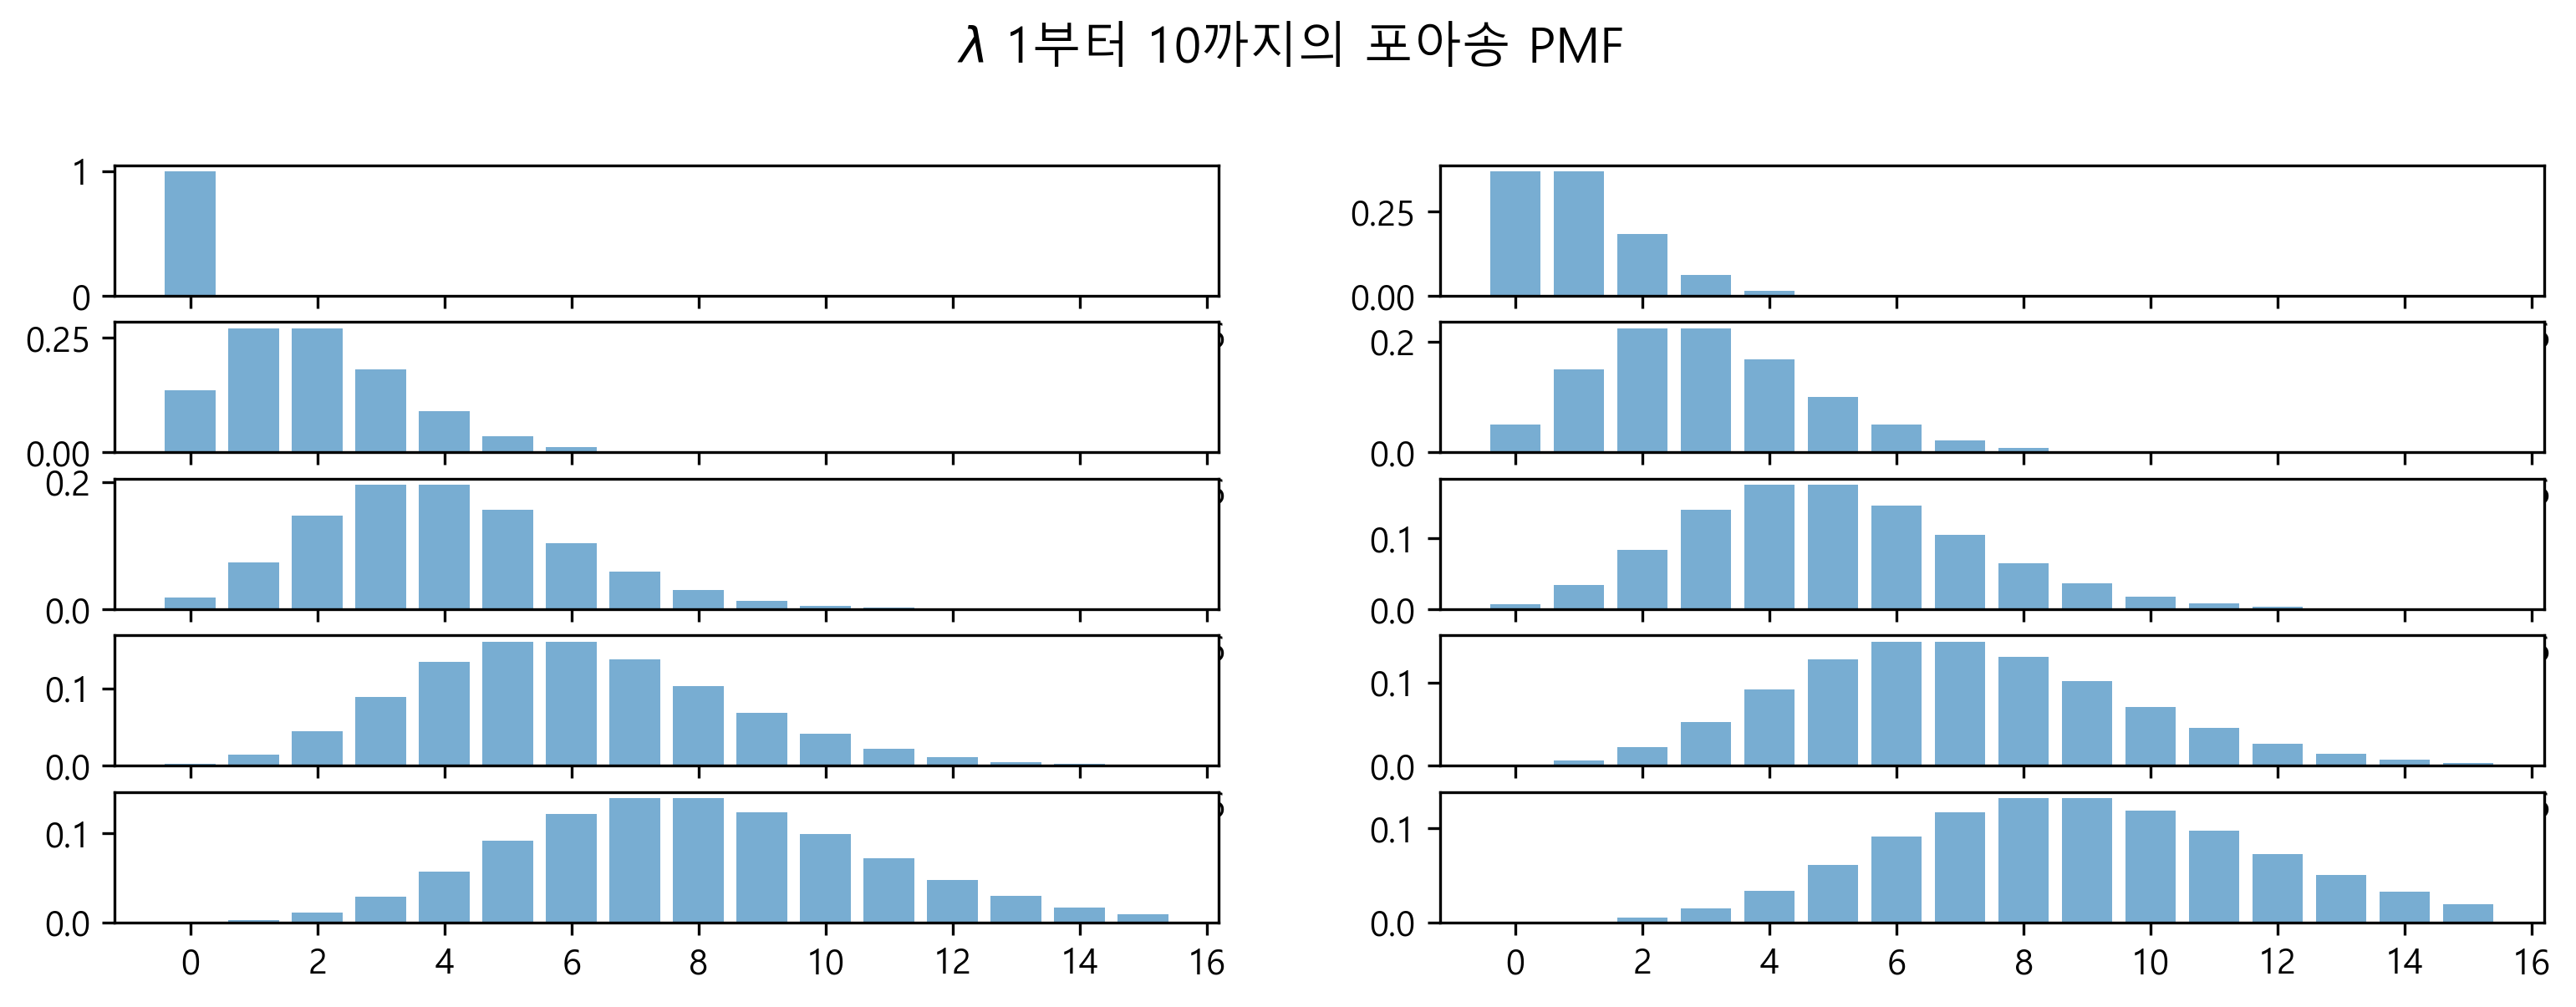

In [54]:
for i in range(10):
    sx = plt.subplot(len(range(10)) / 2, 2, i+1) 
    possion_pmf(np.arange(16), i)
plt.suptitle("$\lambda$ 1부터 10까지의 포아송 PMF",y=1.02,fontsize=14)

# (p.29) 1.3.2. 확률변수가 연속적인 경우
- 연속적인 확률변수는 확률분포함수(PDF)를 가진다. 
- 연속확률분포의 예에는 감마분포, 정규분포 등이 있다. 
- 아래에서 다룰 지수확률분포는 감마분포의 일종이다. 
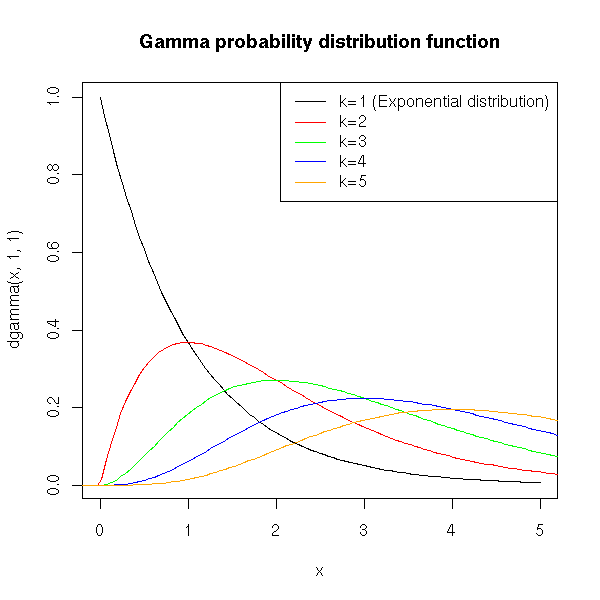
**Reference** : http://zoonek2.free.fr/UNIX/48_R/07.html

(0, 1.2)

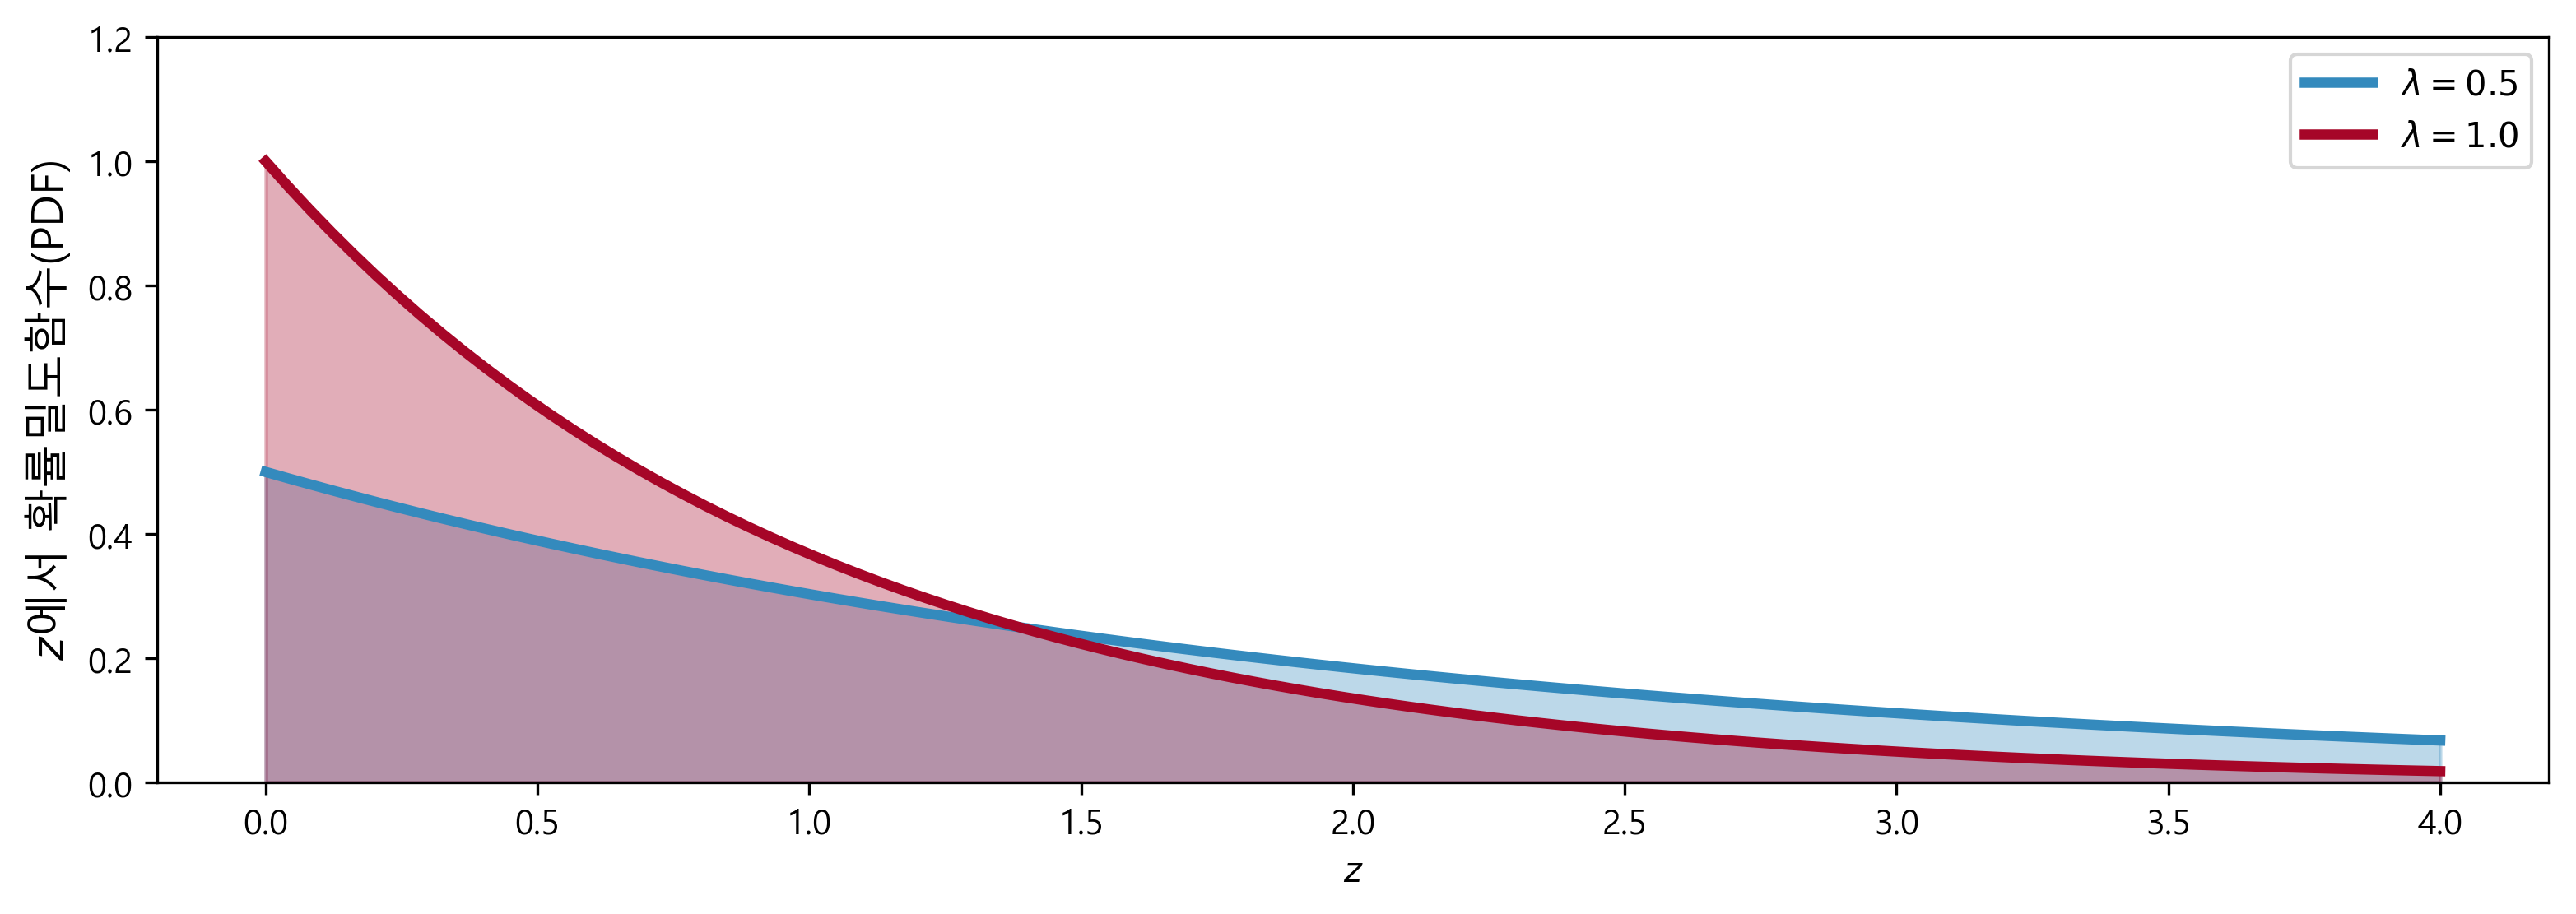

In [4]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("$z$에서 확률밀도함수(PDF)",fontsize=13)
plt.xlabel("$z$")
plt.ylim(0, 1.2)
#plt.title("여러 $\lambda$값에 따른 지수랜덤변수의 확률밀도함수");

# 1.4. 컴퓨터를 사용하여 베이지안 추론하기

## 1.4.1. 예제: 문자메시지 데이터에서 행동 추론하기

In [17]:
figsize(12.5, 3.5)

#원문 코드
#count_data = np.loadtxt(r"data\txtdata.csv")
#실습 코드
count_data = np.loadtxt(r"txtdata.csv")
n_count_data = len(count_data)

In [18]:
np.arange(n_count_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [19]:
import pandas as pd

In [20]:
pd.DataFrame(count_data).T

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,13.0,24.0,8.0,24.0,7.0,35.0,14.0,11.0,15.0,11.0,...,30.0,13.0,27.0,0.0,39.0,37.0,5.0,14.0,13.0,22.0


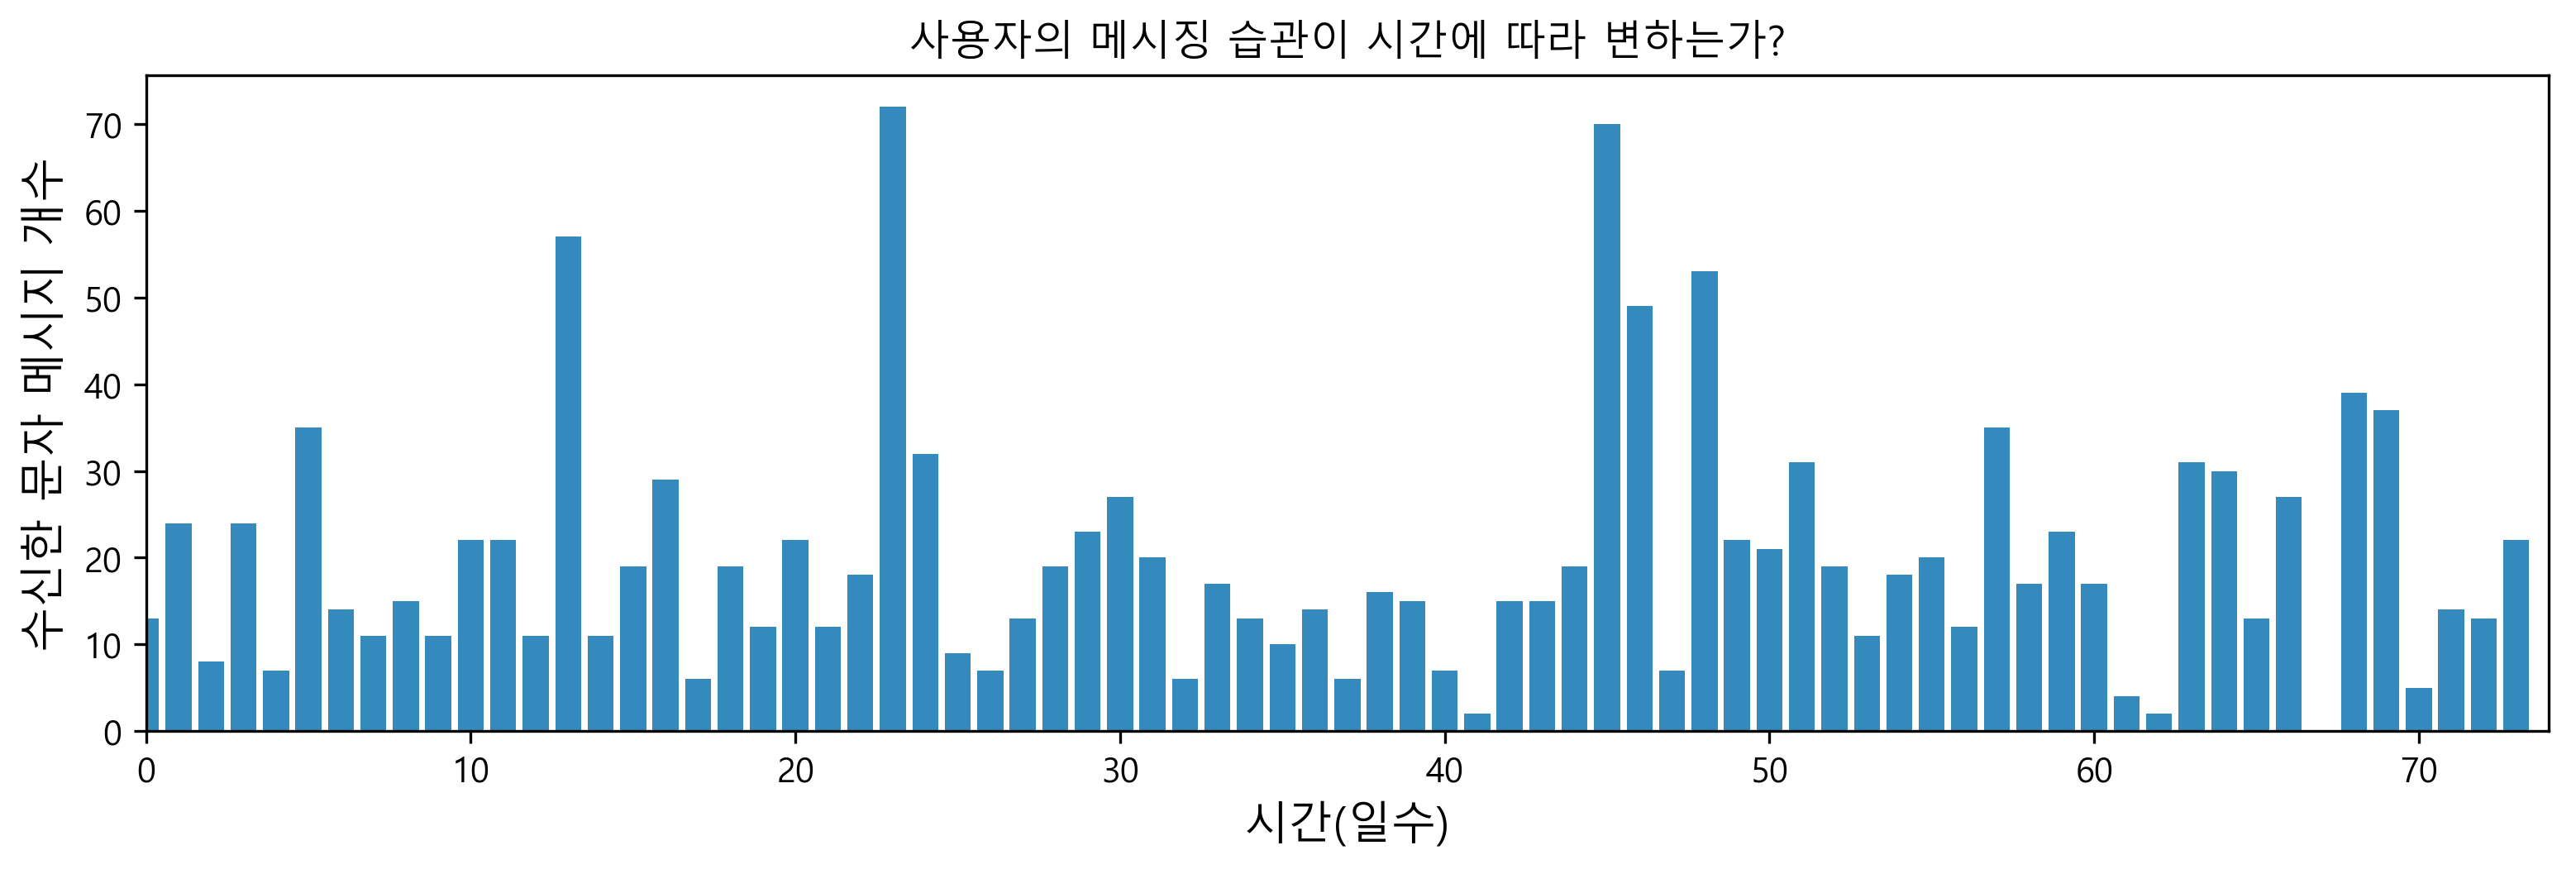

In [21]:
plt.bar(np.arange(n_count_data), count_data, color="#348ABD") # x= 문자 온 날짜 수, y = 수신한 문자 갯수
plt.xlabel("시간(일수)",fontsize=13)
plt.ylabel("수신한 문자 메시지 개수",fontsize=13)
plt.title("사용자의 메시징 습관이 시간에 따라 변하는가?")
plt.xlim(0, n_count_data); # x값은 0부터 74까지 보여준다. 

In [3]:
!pip install pymc

In [11]:
import pymc

ImportError: DLL load failed: 지정된 프로시저를 찾을 수 없습니다.

In [ ]:

alpha = 1.0 / count_data.mean()  # count_data 변수는 문자메시지 갯수를
                               # 저장하고 있다
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [7]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 43 73 10


In [8]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda1은 tau 이전 lambda이다
    out[tau:] = lambda_2  # lambda2는 tau 이후 lambda이다
    return out

In [9]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [10]:
# 3장에서 이 코드를 설명할 것이다
# we will get
# 30,000 (40,000 minus 10,000) samples back.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 6.0 sec

In [11]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

In [85]:
2+02

SyntaxError: invalid token (<ipython-input-85-f92c44d653a7>, line 1)

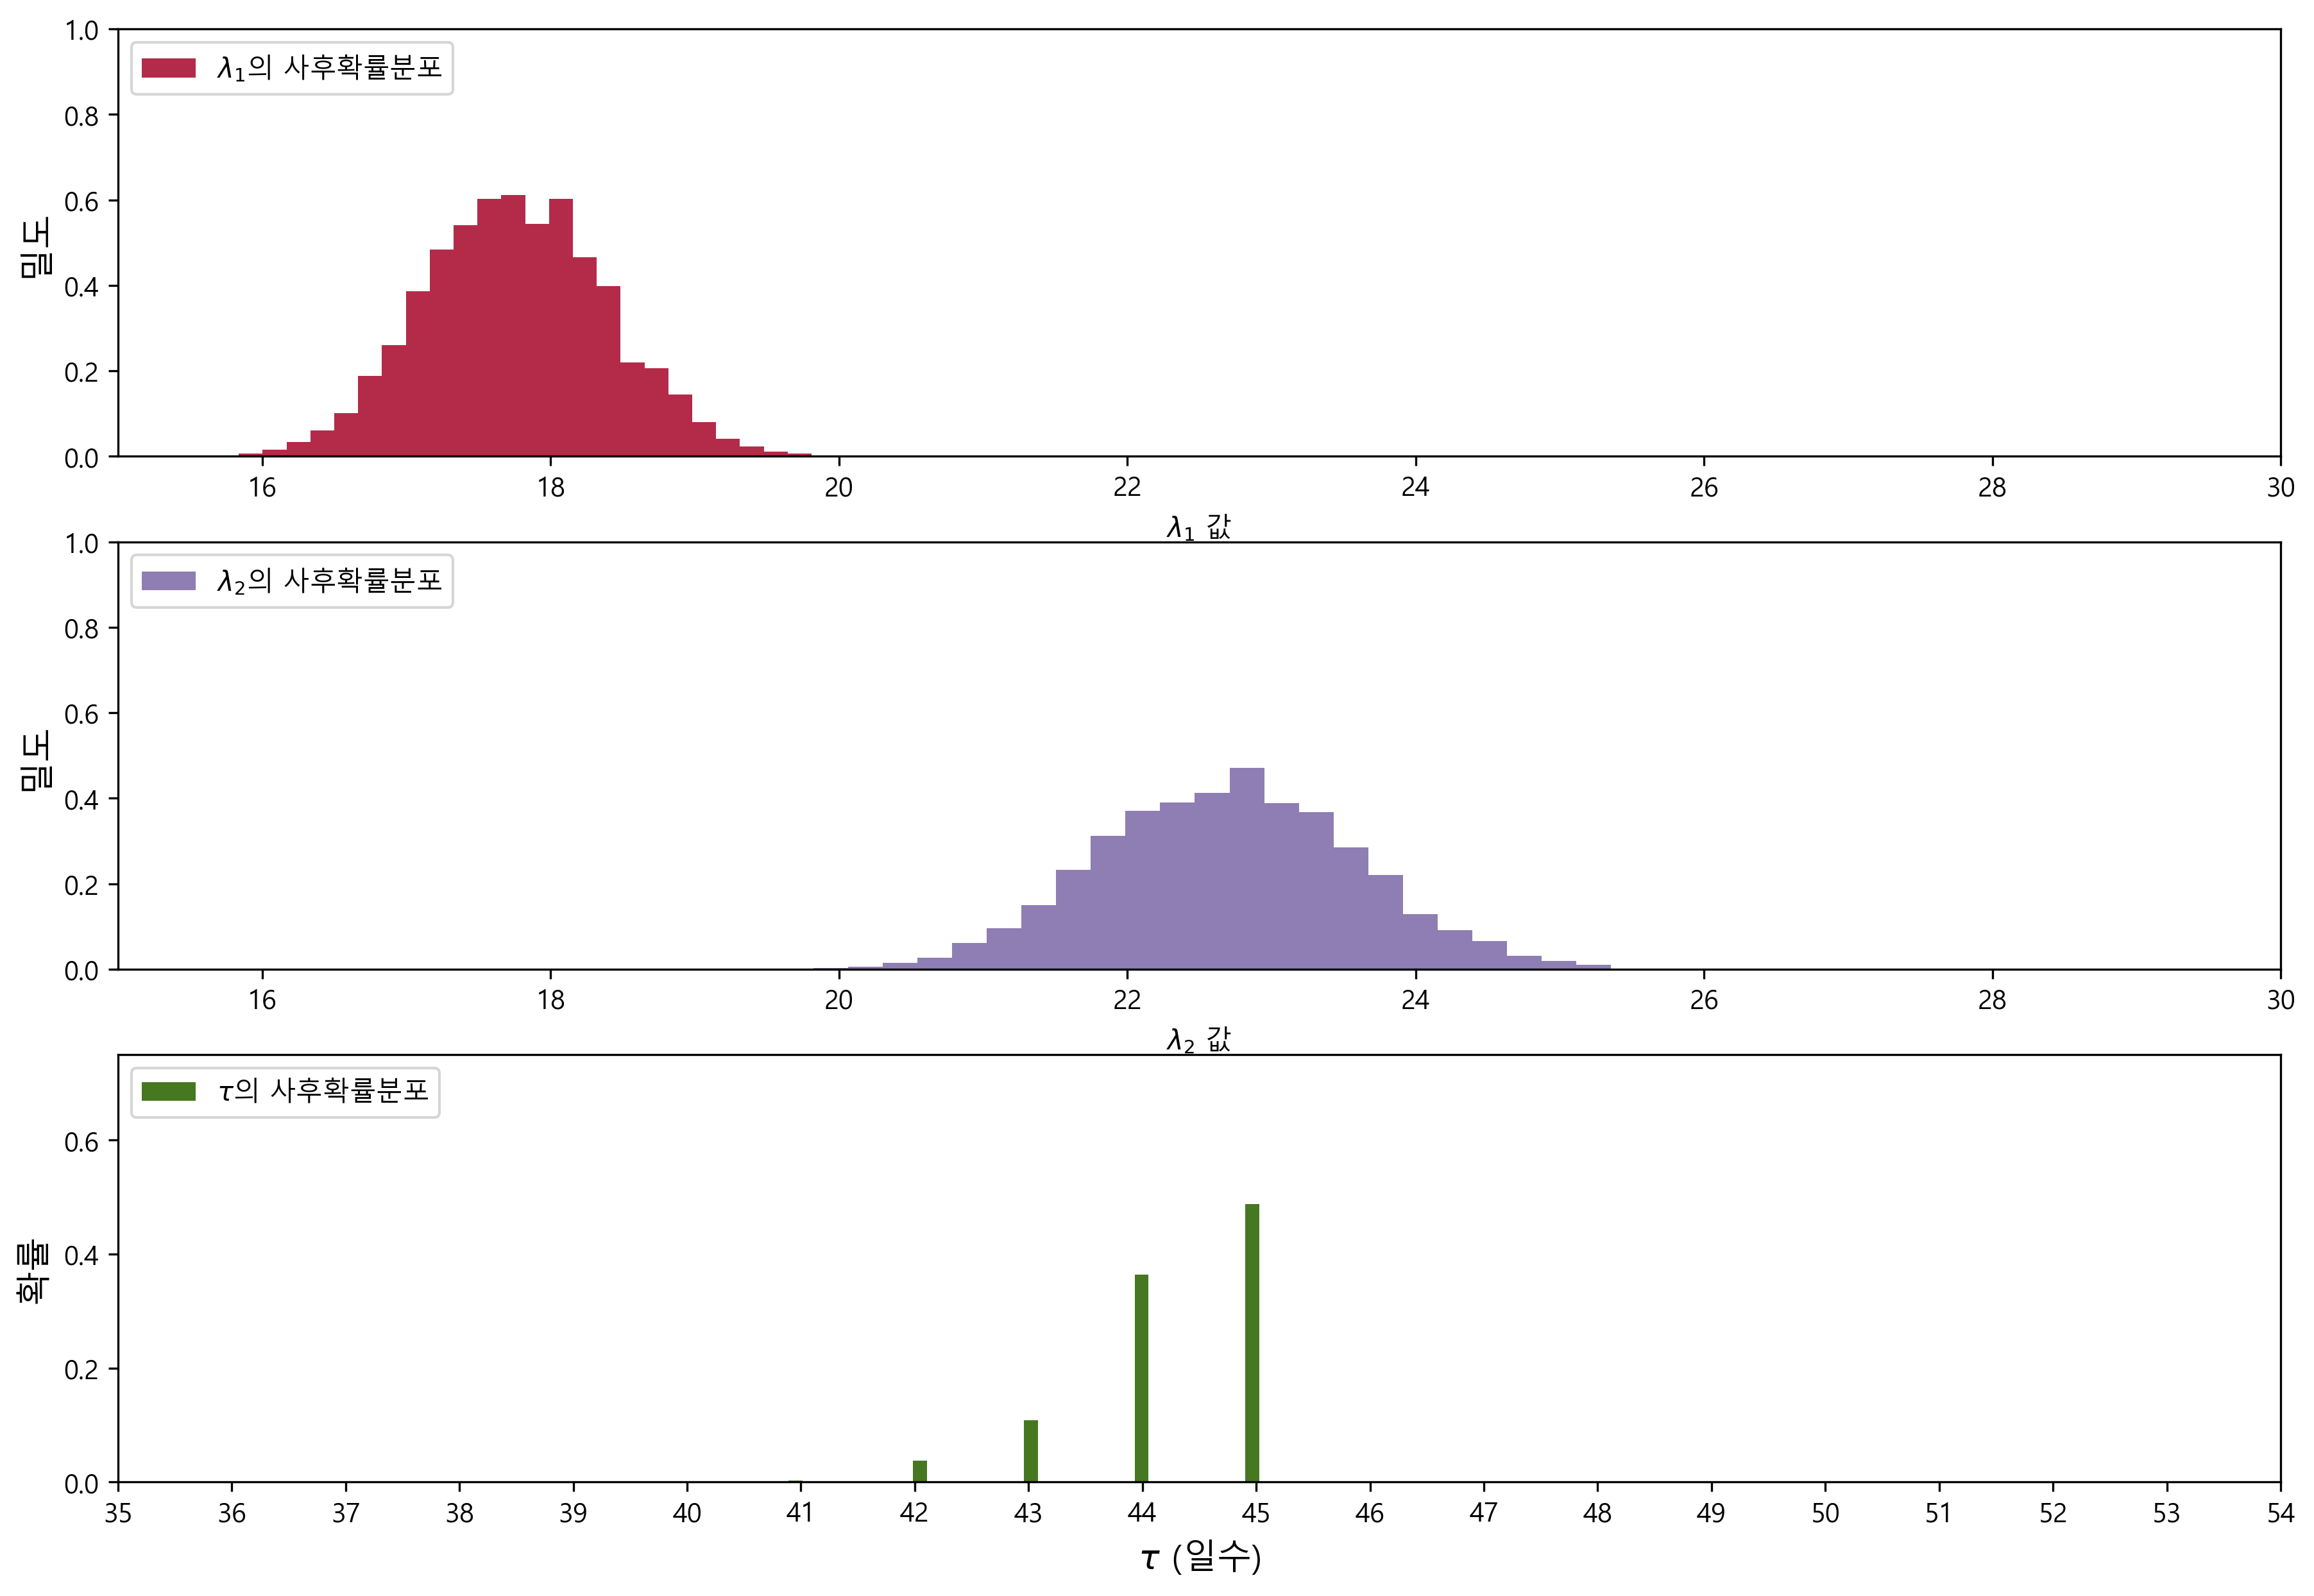

In [12]:
figsize(14.5, 10)
# 표본의 히스토그램:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포", color="#A60628", normed=True)
plt.legend(loc="upper left")
#plt.title(r"""모수 $\lambda_1,\;\lambda_2,\;\tau$의 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도",fontsize=13)

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"$\tau$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (일수)",fontsize=13)
plt.ylabel("확률",fontsize=13);

[ 17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76235033  17.76235033  17.76235033
  17.76235033  17.76235033  17.76249636  17.76310982  17.76310982
  17.76353887  17.7702155   17.93279406  18.4292974   20.24102111
  22.70408074  22.70487872  22.70487872  22.70487872  22.70487872
  22.70487872  22.70487872  22.70487872  22.70487872  22.70487872
  22.70487872  22.70487872  22.70487872  22.70487872  22.70487872
  22.70487872  22.70487872  22.70487872  22.70487872  22.70487872
  22.70487872  22.70487872  22.70487872  22.70487872  22.70487872
  22.70487872  22.70487872  22.70487872  22.70487872]


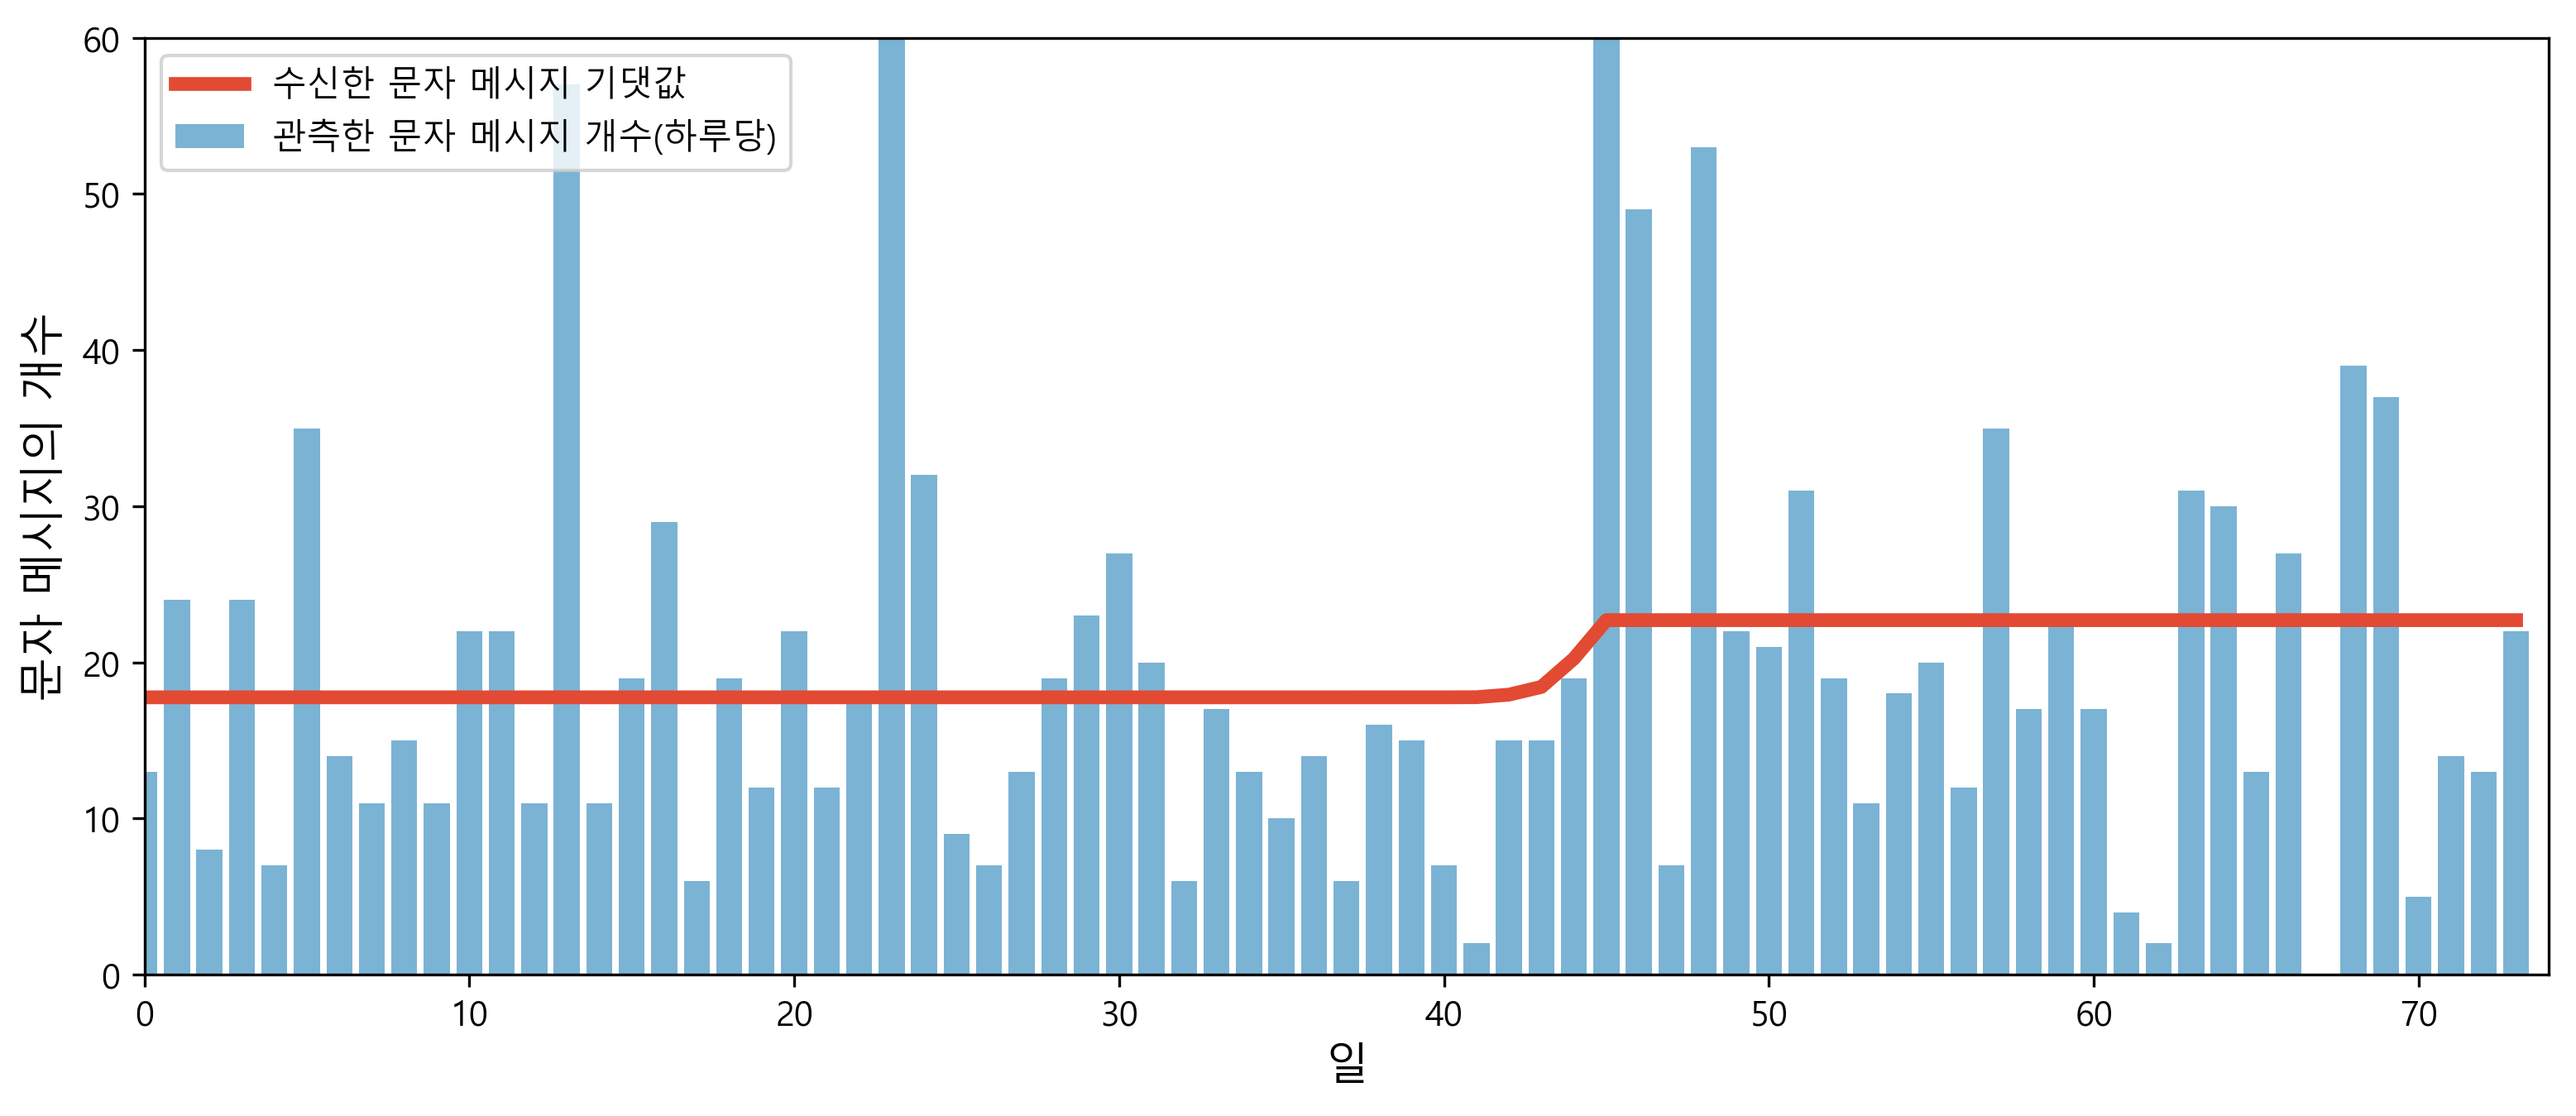

In [13]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples은 
# 해당 사후확률분포에서 얻은 N 개의 표본은 가진다.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # number of data points #데이터 포인트 수
for day in range(0, n_count_data):
    # ix 는'day'값이전에 발생한 스위치포인트(switchpoint)에 해당하는 
    # 모든 tau표본의 boolean 인덱스이다. 
    ix = day < tau_samples
    # 각 사후확률분포의 표본은 tau값에 해당한다. tau값은 스위치포인트 이전인지(lambda1)
    # 이후인지(lambda2)을 가리킨다
    # lambda1/2의 사후확률분포 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의 
    # lambda 기대값을 얻을 수 있다.
    # 설명한 바와 같이 문자메시지 갯수 랜덤변수는 포아송분포를 따른다. 
    # 그러므로 lambda(포아송 모수)는 메시지갯수의 기대값이다.
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="수신한 문자 메시지 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("일", fontsize=13)
plt.ylabel("문자 메시지의 개수", fontsize=13)
#plt.title("수신한 문자메시지 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="관측한 문자 메시지 개수(하루당)")

plt.legend(loc="upper left");
print (expected_texts_per_day)

In [14]:
print (lambda_1_samples < lambda_2_samples)
# Boolean array: True if lambda_1 is less than lambda_2.
# Boolean 배열 : lambda_1이 lambda_2보다 작으면 True이다.

[ True  True  True ...,  True  True  True]


In [15]:
# How often does this happen?
# 얼마나 자주 발생하는 가?
print ((lambda_1_samples < lambda_2_samples).sum())
# How many samples are there?
# 표본이 얼마나 있는 가?
print (lambda_1_samples.shape[0])

30000
30000


In [16]:
# The ratio is the probability. Or, we can just use .mean:
# 비율은 확률이다. 또는 .mean을 사용할 수 있다.
print ((lambda_1_samples < lambda_2_samples).mean())

1.0


In [17]:
# The vector abs(lambda_1_samples - lambda_2_samples) > 1 is a boolean,
# True if the values are more than 1 apart, False otherwise.
# How often does this happen? Use .mean()
# abs(lambda_1_samples - lambda_2_samples) > 1 은 boolean 벡터이다.
# 값이 1이상이면 True, 그렇치 않으면 False이다
# 얼마나 자주 발생하는 가? .mean()을 사용한다
for d in [1,2,5,10]:
    v = (abs(lambda_1_samples-lambda_2_samples)>=d).mean()
print("What is the probability the difference is larger than %d? %.2f"%(d,v))

What is the probability the difference is larger than 10? 0.00


In [18]:
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)
tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper=n_count_data)
@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2,lambda_1=lambda_1, lambda_2=lambda_2, lambda_3 = lambda_3):
    out = np.zeros(n_count_data) # 데이터 포인트의 갯수
    out[:tau_1] = lambda_1 # lambda_1은 tau이전 lambda이다 
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3 # lambda_2은 tau이후 lambda이다

    return out
observation = pm.Poisson("obs", lambda_, value=count_data,observed=True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1,
tau_2])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 10.2 sec

In [19]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
tau_1_samples = mcmc.trace('tau_1')[:]
tau_2_samples = mcmc.trace('tau_2')[:]

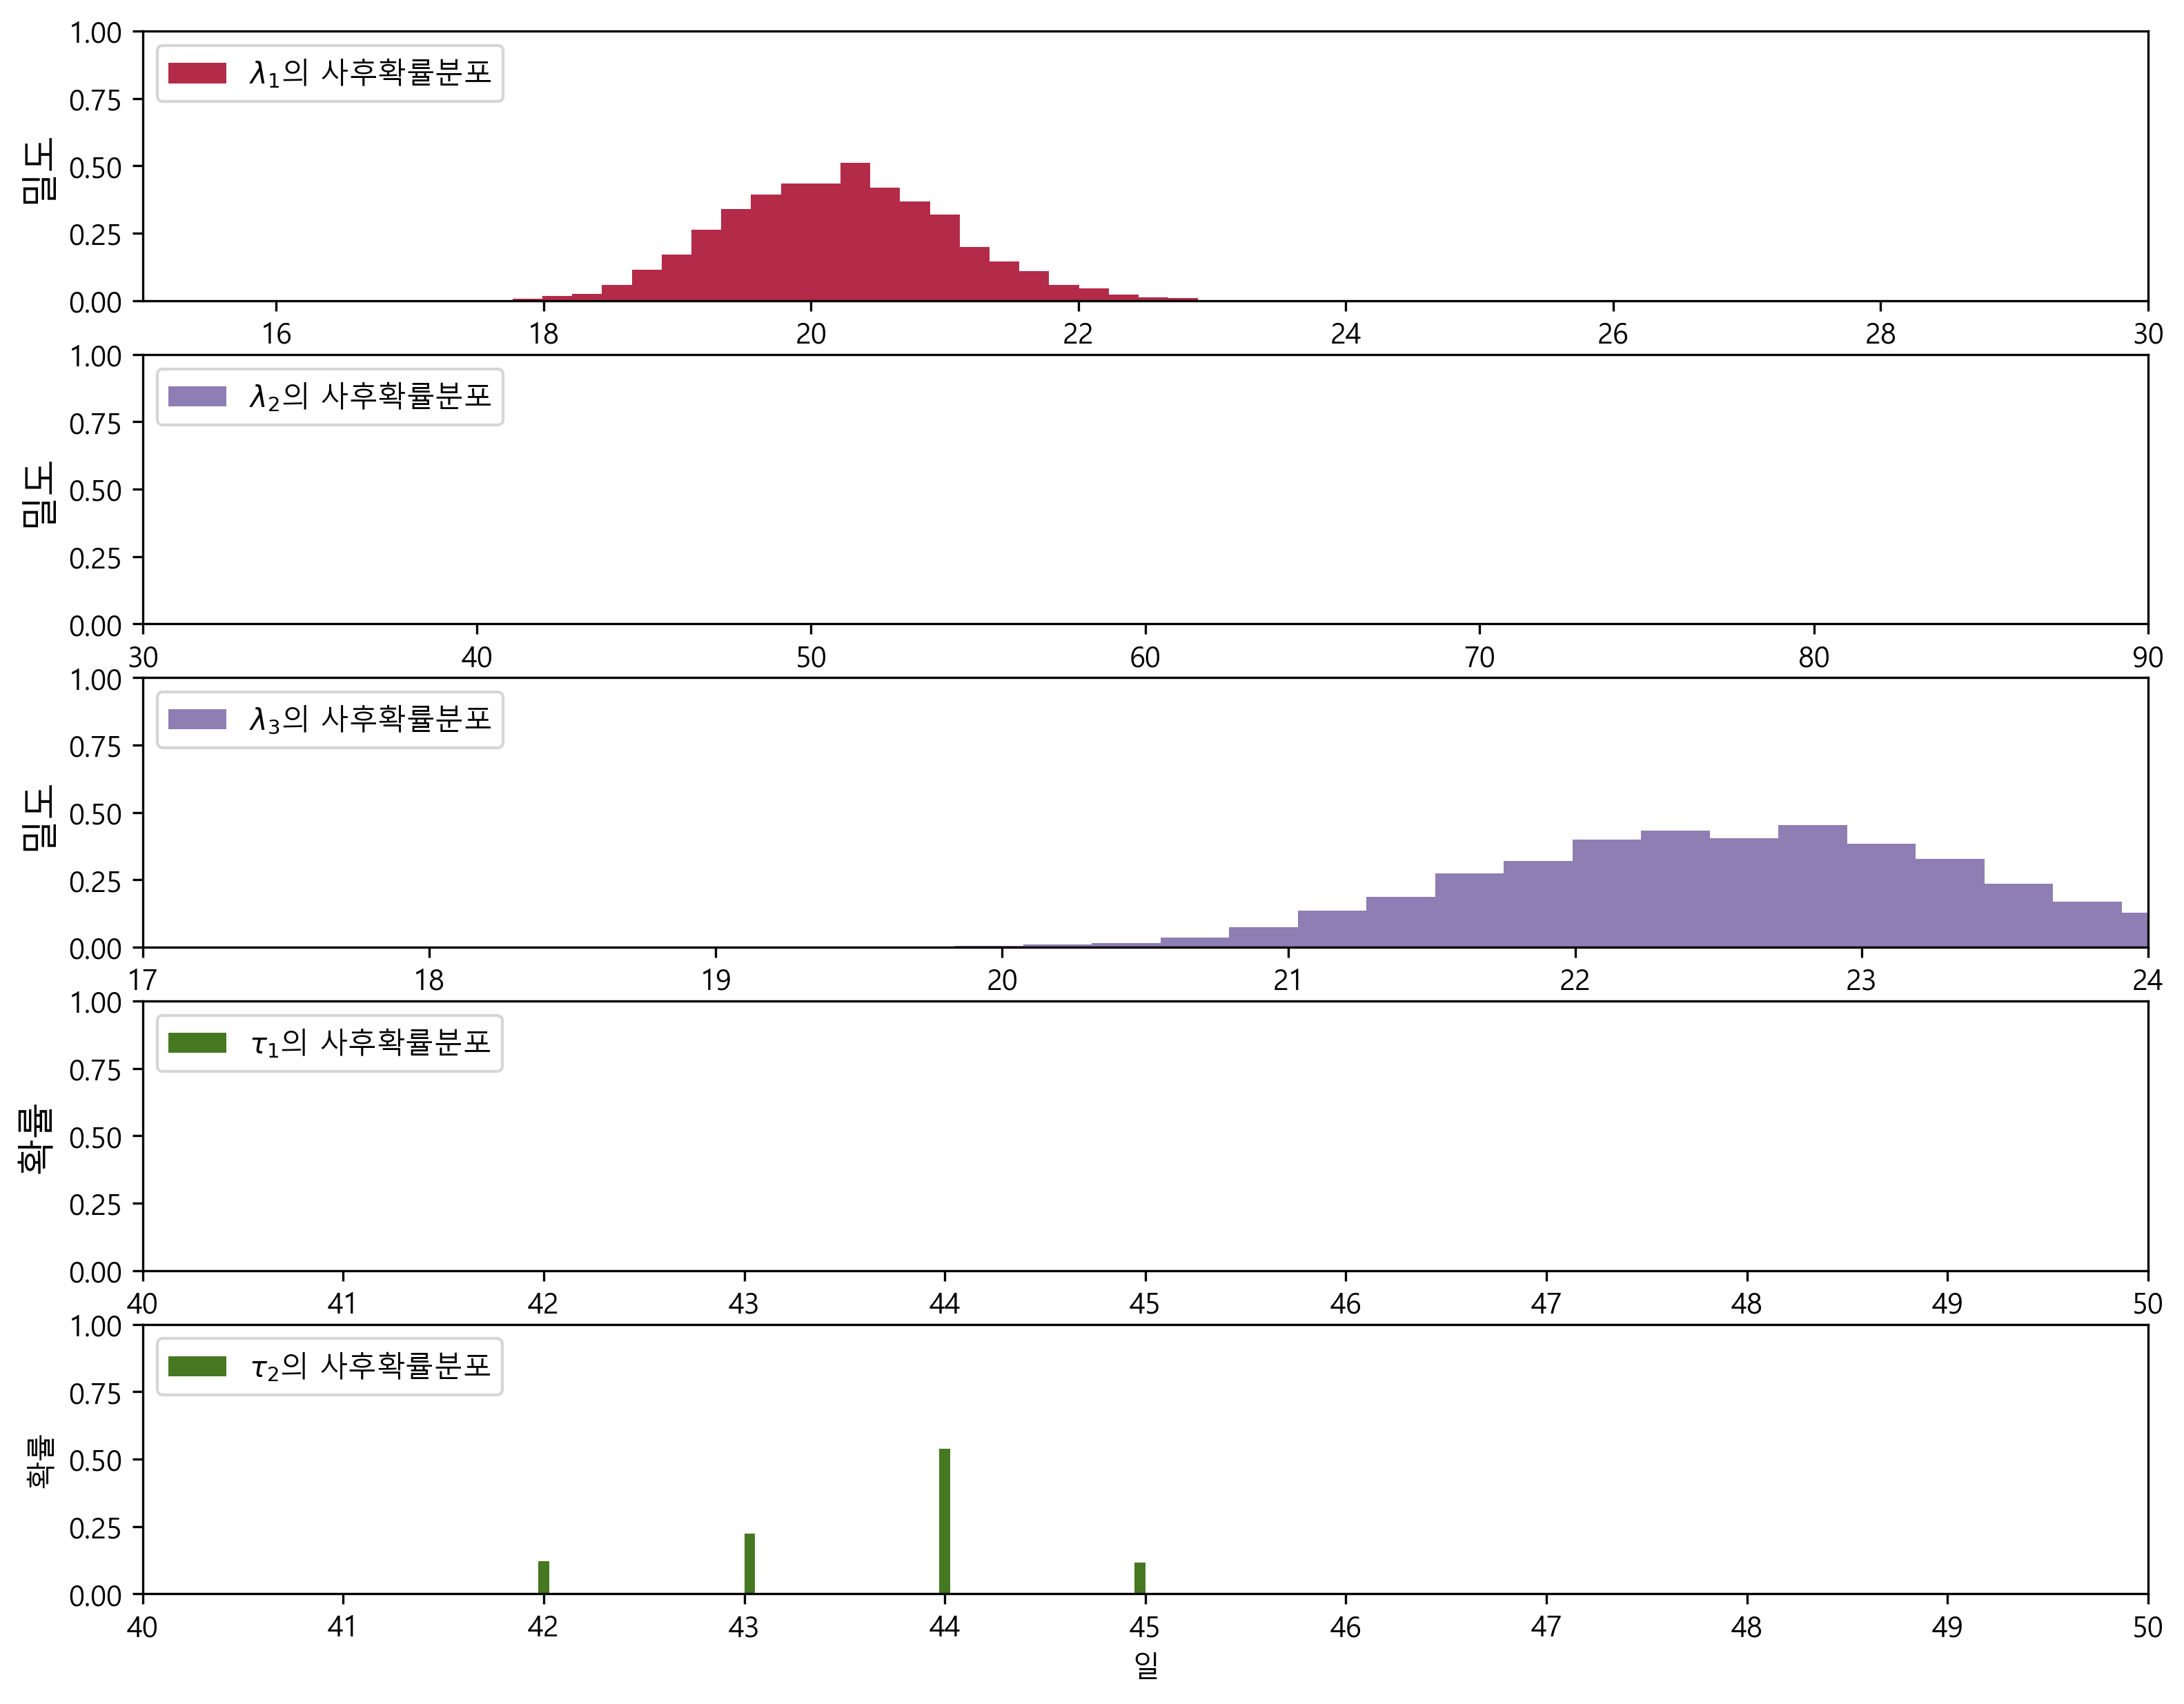

In [20]:
figsize(12.5, 10)
# histogram of the samples:
# 표본의 히스토그램
ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포", color="#A60628", normed=True)
plt.legend(loc="upper left")
#plt.title(r"""확장된 문자메시지 모델에서 미지의 모수 5개에 대한 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([30, 90])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_3$의 사후확률분포", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([17, 24])
plt.xlabel("$\lambda_3$ 값")
plt.ylabel("밀도", fontsize=13)

plt.subplot(514)
w = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_1$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])

plt.xlabel(r"일", fontsize=13)
plt.ylabel("확률", fontsize=13)

plt.subplot(515)
w = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_2$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])
plt.xlabel(r"일")
plt.ylabel("확률");

In [21]:
print (lambda_1_samples.mean())
print (lambda_1_samples.mean())

20.2153252
20.2153252


In [22]:
(lambda_2_samples-lambda_1_samples)/lambda_1_samples

array([-0.47336361, -0.46550827, -0.46550827, ..., -0.39423438,
       -0.39423438, -0.38858848])

In [23]:
relative_increase_samples = (lambda_2_samples-lambda_1_samples)/lambda_1_samples
print (relative_increase_samples)

[-0.47336361 -0.46550827 -0.46550827 ..., -0.39423438 -0.39423438
 -0.38858848]


-0.429914497385


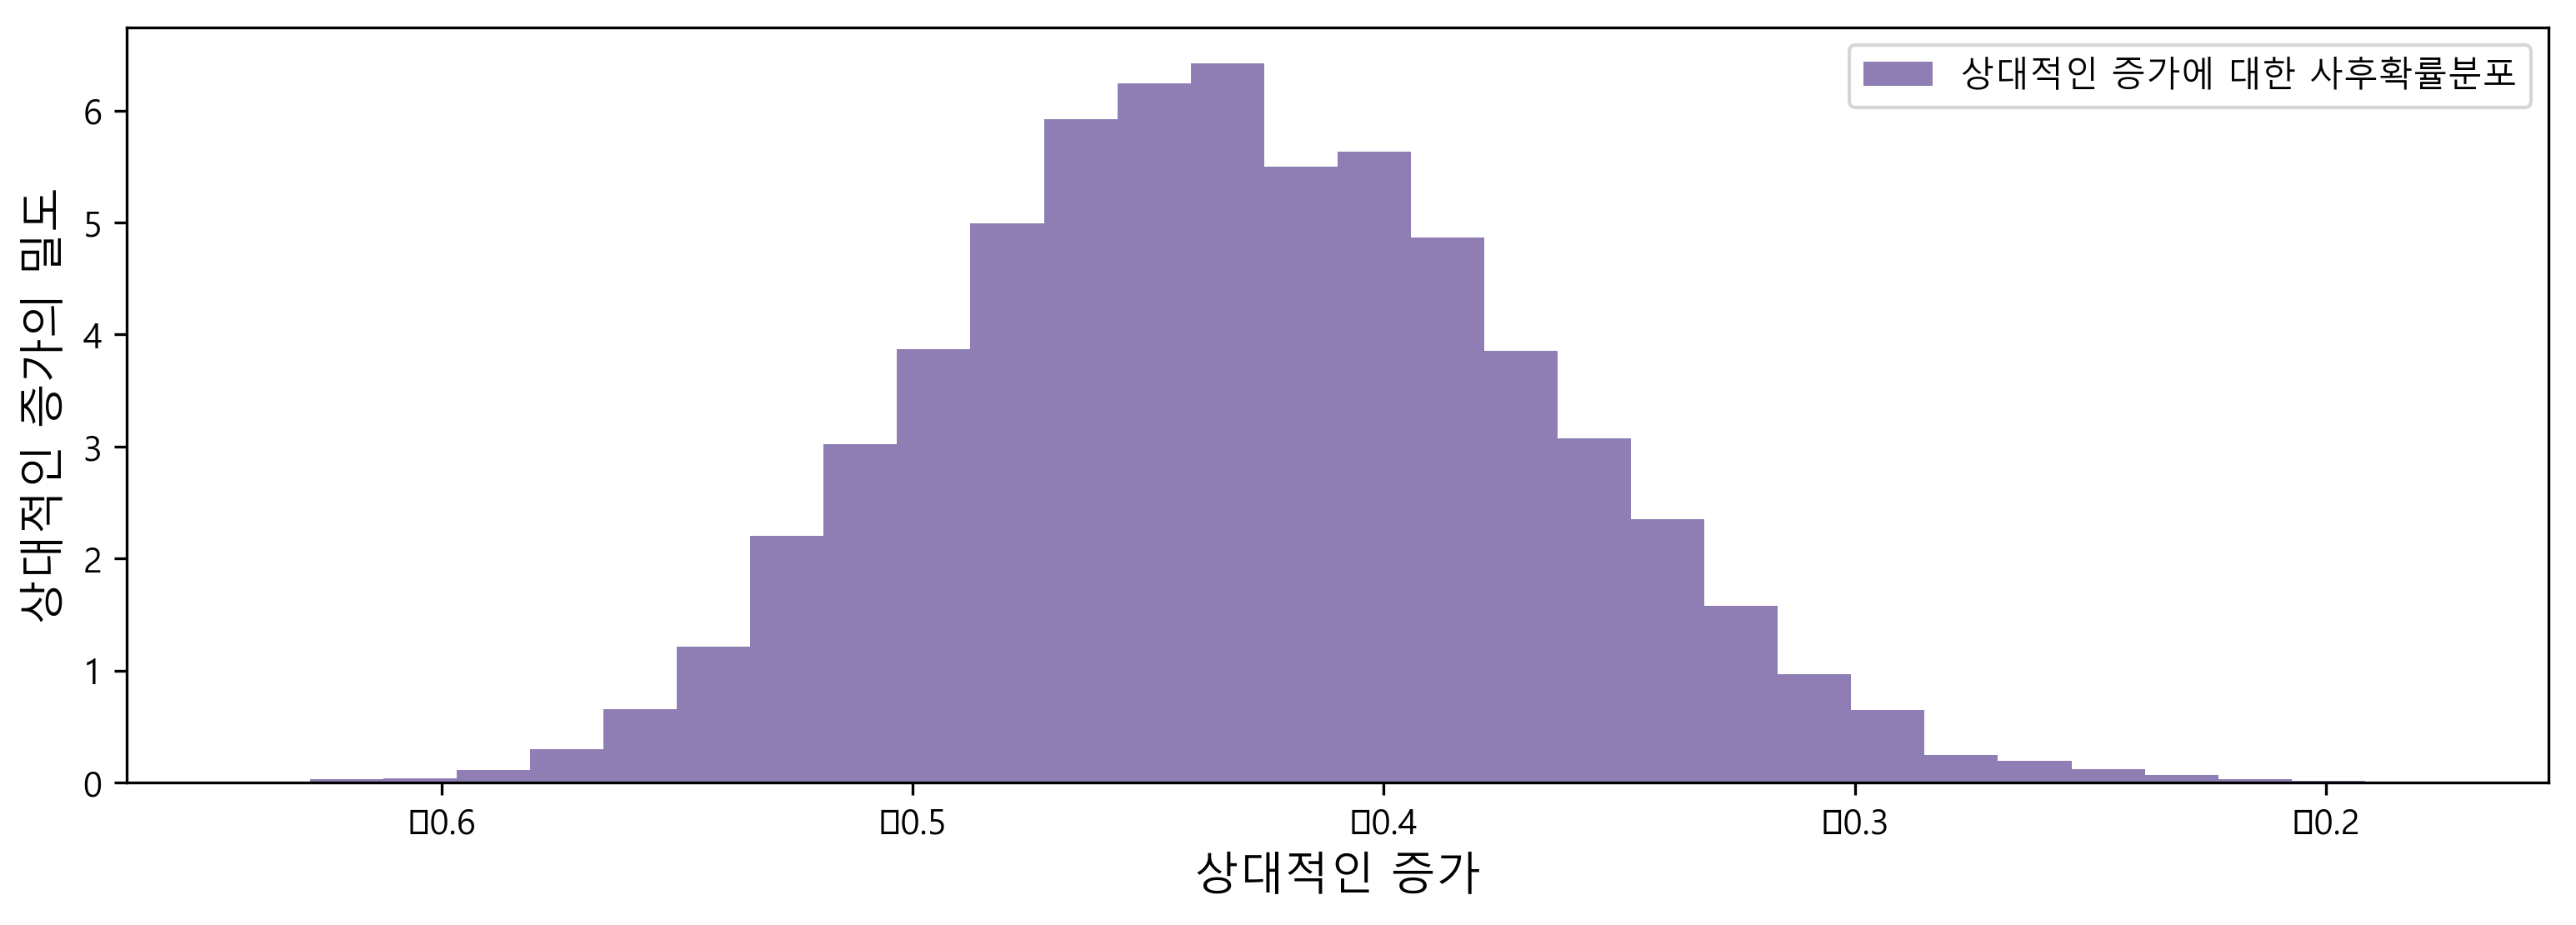

In [24]:
figsize(12.5,4)
plt.hist(relative_increase_samples, histtype='stepfilled',
bins=30, alpha=0.85, color="#7A68A6", normed=True,
label='상대적인 증가에 대한 사후확률분포')
plt.xlabel("상대적인 증가", fontsize=13)
plt.ylabel("상대적인 증가의 밀도", fontsize=13)
#plt.title("상대적인 증가에 대한 사후확률분포")
plt.legend();
print (relative_increase_samples.mean())

In [25]:
print (relative_increase_samples.mean())

-0.429914497385


In [26]:
ix = tau_samples < 45
print (lambda_1_samples[ix].mean())

20.2244342003
